In [1]:
%matplotlib inline

In [2]:
import math

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import sympy as sp

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from ipywidgets import interact

In [10]:
import seaborn as sns

### AMD share price

In [11]:
AMD = pd.read_html("https://hk.finance.yahoo.com/quote/AMD/history/")

In [12]:
AMD #101列7行,為list

[                                日期                             開市  \
 0                      2019年11月25日                          39.50   
 1                      2019年11月22日                          39.36   
 2                      2019年11月21日                          40.42   
 3                      2019年11月20日                          40.96   
 4                      2019年11月19日                          40.14   
 5                      2019年11月18日                          38.65   
 6                      2019年11月15日                          38.94   
 7                      2019年11月14日                          37.51   
 8                      2019年11月13日                          36.65   
 9                      2019年11月12日                          36.43   
 10                     2019年11月11日                          35.96   
 11                     2019年11月08日                          36.06   
 12                     2019年11月07日                          36.52   
 13                 

In [13]:
AMD_data = pd.DataFrame(AMD[0])

In [14]:
AMD_data
AMD_data.drop(100, axis=0, inplace=True)

In [15]:
AMD_data

,日期,開市,最高,最低,收市*,經調整收市價**,成交量
0,2019年11月25日,39.50,40.17,39.49,39.79,39.79,45769500
1,2019年11月22日,39.36,39.89,38.19,39.15,39.15,56931900
2,2019年11月21日,40.42,40.71,38.64,39.52,39.52,88069400
3,2019年11月20日,40.96,41.75,40.07,40.98,40.98,79767900
4,2019年11月19日,40.14,41.79,39.69,41.29,41.29,94373000
5,2019年11月18日,38.65,39.99,38.60,39.88,39.88,66102800
6,2019年11月15日,38.94,39.37,38.34,38.56,38.56,62958500
7,2019年11月14日,37.51,38.50,37.36,38.35,38.35,65829500
8,2019年11月13日,36.65,37.96,36.58,37.52,37.52,67648300
9,2019年11月12日,36.43,37.13,36.40,36.71,36.71,58664500


    (收市-開市=跌幅or漲幅) 和 成交量的關係

In [16]:
open_num = AMD_data["開市"].astype('float64')
close_num = AMD_data["收市*"].astype('float64')
total_volume = AMD_data["成交量"].astype("float64")

fluctuation = open_num - close_num

<BarContainer object of 100 artists>

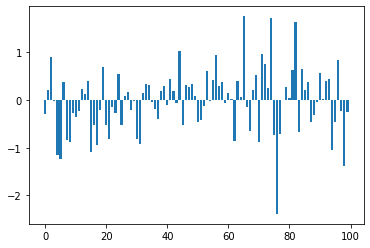

In [17]:
plt.bar(range(0, 100), fluctuation, width=0.7)

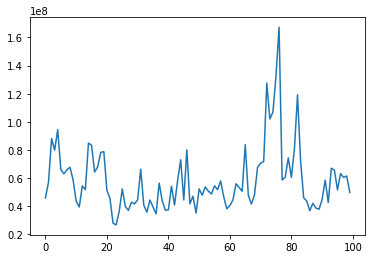

In [18]:
plt.plot(total_volume)

    使用雙Y軸，疊加兩張圖

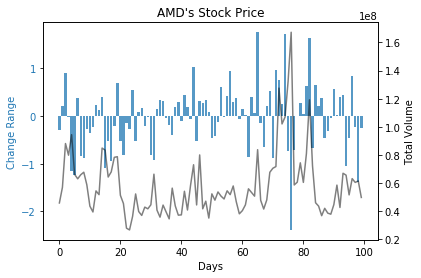

In [19]:
fig, ax1 = plt.subplots()
plt.title('AMD\'s Stock Price')
plt.xlabel('Days')
ax2 = ax1.twinx()

ax1.set_ylabel('Change Range', color='tab:blue')
ax1.bar(range(0, 100), fluctuation, color='tab:blue', alpha=0.75)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2.set_ylabel('Total Volume', color='black')
ax2.plot(range(0, 100), total_volume, color='black', alpha=0.5)
ax2.tick_params(axis='y', labelcolor='black')

    看不太出來關係如何,將成交量和波動幅度都"標準化"再來比較

In [20]:
from sklearn import preprocessing

In [21]:
Total_volume = preprocessing.scale(total_volume, with_mean=True, with_std=True)
Fluctuation = preprocessing.scale(fluctuation, with_mean=True, with_std=True)

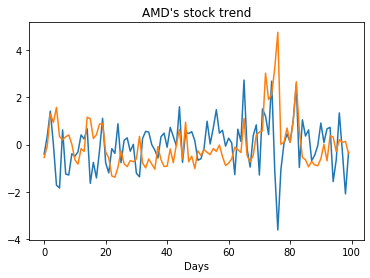

In [22]:
plt.plot(range(0, 100), Fluctuation)
plt.plot(Total_volume)
plt.xlabel('Days')
plt.title('AMD\'s stock trend')
plt.show()

    相較前一張圖,這張圖的關係清楚的多

    相減看看

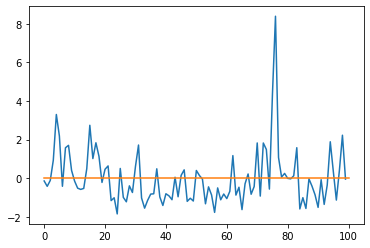

In [23]:
y = 0
plt.plot(Total_volume - Fluctuation)
plt.plot([0,100], [0,0])
plt.show()

    雖然感覺上有點趨勢，但是因為標準化過後反而無法完全理解圖表表達出的意思，可能需要再試試其他方法來找出相關性